# imports

In [78]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

In [69]:
# read files

In [70]:
path = 'data/'

In [71]:
def save_graph(G, graph_name):
    filepath = path + 'graph/' + graph_name + '.gexf'
    nx.write_gexf(G, filepath)

In [72]:
def save_csv(df, file_name):
    filepath = path + file_name + '.csv'
    df.to_csv(filepath, index = False)  

In [74]:
file_three_js_task_user = 'three.js-id_commit-user.csv'

In [75]:
df_three_users_merged_no_dupl = pd.read_csv(path + file_three_js_task_user)

In [76]:
df_three_users_merged_no_dupl_copy = df_three_users_merged_no_dupl.copy()

# networkx

In [77]:
len(df_three_users_merged_no_dupl)

27548

# Example on 14 connections



In [ ]:
df_tmp = df_three_users_merged_no_dupl[:14]

In [394]:
df_tmp

,ID,User
238087,1,chrislloyd
1063147,1,splatcollision
1063146,1,mrdoob
1063148,2,mrdoob
1063149,2,Ovid
1063178,2,mindlapse
1063176,2,sr3d
1063172,2,D1plo1d
1063150,2,jurjen
1063180,3,mrdoob


In [395]:
id_pri = list(df_tmp["ID"].unique())
id_user = list(df_tmp["User"].unique())
nb_links = len(df_tmp)

In [396]:
id_pri

[1, 2, 3, 4, 5]

In [397]:
id_user

['chrislloyd',
 'splatcollision',
 'mrdoob',
 'Ovid',
 'mindlapse',
 'sr3d',
 'D1plo1d',
 'jurjen',
 'icidasset',
 'SignpostMarv']

In [398]:
nb_links

14

In [399]:
size = range(0, nb_links)
# size = range(0, 15)

edge_list = []
for i in size:
    left = df_tmp['ID'].iloc[i]
    right = df_tmp['User'].iloc[i]
    pair = (left, right)
    edge_list.append(pair)

In [400]:
len(edge_list)

14

In [370]:
# nx.is_connected(G)

## Bipartite graph

In [418]:
# Create a bipartite graph
B = nx.Graph()
B.add_nodes_from(id_pri, node_type = "PRI", bipartite = 0)
B.add_nodes_from(id_user, node_type = "User", bipartite = 1)
B.add_edges_from(edge_list)

In [419]:
bipartite.is_bipartite(B)

True

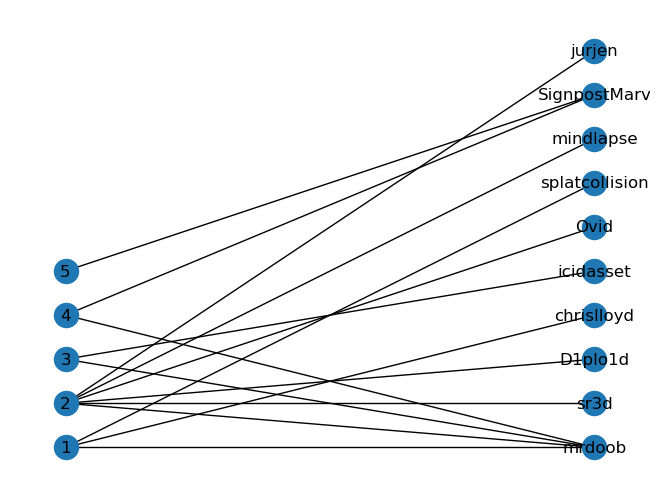

In [404]:
# Get the sets of nodes
left_nodes_pri, right_nodes_user = nx.bipartite.sets(B)

# horisontal - 0/index #vertical - index/0

# Draw the graph
pos = dict()
pos.update((node, (0, index)) for index, node in enumerate(left_nodes_pri))
pos.update((node, (1, index)) for index, node in enumerate(right_nodes_user))
nx.draw(B, pos=pos, with_labels=True)

# Show the plot
plt.show()

## Full graph

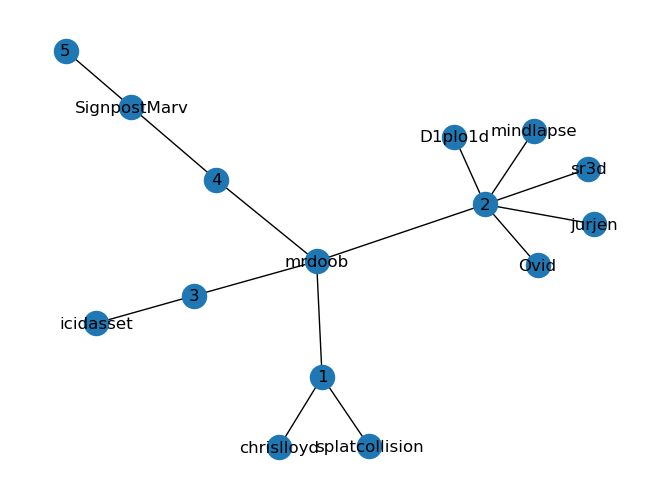

In [406]:
from networkx.algorithms import bipartite
nx.draw(B, with_labels=True)

### Projection on users

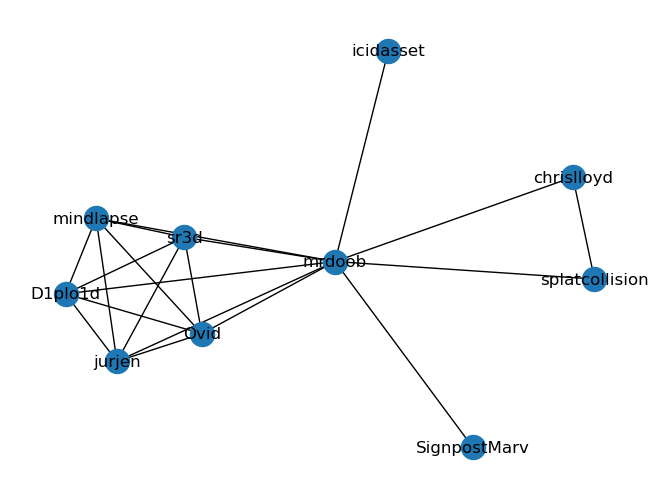

In [410]:
G = bipartite.projected_graph(B, id_user)
nx.draw(G, with_labels=True)
# list(G.edges())

### Projection on tasks/comments

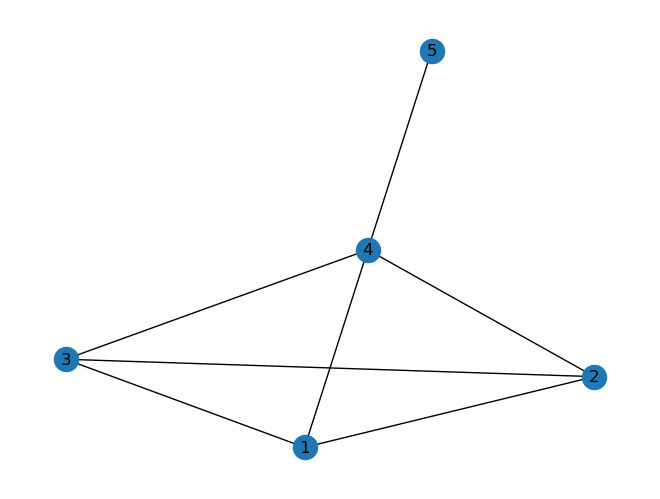

In [411]:
G = bipartite.projected_graph(B, id_pri)
nx.draw(G, with_labels=True)
# list(G.edges())

# Full data

In [424]:
df_tmp = df_three_users_merged_no_dupl

In [425]:
id_pri = list(df_tmp["ID"].unique())
id_user = list(df_tmp["User"].unique())
nb_links = len(df_tmp)

In [426]:
nb_links

27548

In [427]:
size = range(0, nb_links)

edge_list = []
for i in size:
    left = df_tmp['ID'].iloc[i]
    right = df_tmp['User'].iloc[i]
    pair = (left, right)
    edge_list.append(pair)

In [428]:
len(edge_list)

27548

## Bipartite graph

In [429]:
# Create a bipartite graph
B = nx.Graph()
B.add_nodes_from(id_pri, node_type = "PRI", bipartite = 0)
B.add_nodes_from(id_user, node_type = "User", bipartite = 1)
B.add_edges_from(edge_list)

In [433]:
bipartite.is_bipartite(B)

True

### Projection on users

In [447]:
G_users = bipartite.weighted_projected_graph(B, id_user)

### Projection on tasks/comments

In [434]:
# G_pri = bipartite.projected_graph(B, id_pri)

# Save graphs

In [445]:
save_graph(B, 'graph_full')

In [448]:
save_graph(G_users, 'graph_users')